In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train.csv', encoding='utf8')
df.head()

,id,comment_text,toxic
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0


In [3]:
df.shape

(5000, 3)

In [4]:
comment_text = df['comment_text'].to_list()

In [5]:
# 1. Using regular expressions, remove IP addresses

import re

rule_ip = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'

comment_text = [re.sub(rule_ip, '', text) for text in comment_text]


In [6]:
print(comment_text)

['"\r\n\r\n A barnstar for you! \r\n\r\n  The Defender of the Wiki Barnstar I like your edit on the Kayastha page. Lets form a solidarity group against those who malign the article and its subject matter. I propose the folloing name for the group.\r\n\r\nUnited intellectuals\' front of Kayastha ethinicty against racist or castist abuse (UIFKEARCA)   "', '"\r\n\r\nThis seems unbalanced.  whatever I have said about Mathsci, he has said far more extreme and unpleasant things about me (not to mention others), and with much greater frequency.  I\'m more than happy to reign myself in, if that\'s what you\'d like (ruth be told, I was just trying to get Mathsci to pay attention and stop being uncivil).  I would expect you to issue the same request to Mathsci.  \r\n\r\n If this is intentionally unbalanced (for whatever reason), please let me know, and I will voluntarily close this account and move on to other things.  I like wikipedia, and I have a lot to contribute in my own way, but there is 

In [7]:
# 2. Using regular expressions, remove URLs

rule_url = ("((http|https|http://www.|https://www.|www.))" +
             "[a-zA-Z0-9@:%._\\+~#?&//=]" +
             "{2,256}\\.[a-z]" +
             "{2,6}\\b([-a-zA-Z0-9@:%" +
             "._\\+~#?&//=]*)")

comment_text = [re.sub(rule_url, '', text) for text in comment_text]

In [8]:
# 3. Normalize the casing

comment_text = [text.lower() for text in comment_text]

In [9]:
# 4. Tokenize using word_tokenize from NLTK

from nltk.tokenize import word_tokenize

comment_text_tokens = [word_tokenize(text) for text in comment_text]

In [10]:
# 5. & 6. Remove stop words and punctuation

from nltk.corpus import stopwords
import string

sw = stopwords.words('english')
punc = list(string.punctuation)
sw_custom = ["must", "would", 'could', "'s", "n't", "'m", "'re", "'ve", "'ll", "'d", "''", '``','...','•','—',]

In [11]:
sw_punc = sw + punc + sw_custom

comment_text_cleaned = []
for item in comment_text_tokens:
    cleaned_text = [word for word in item if ((word not in sw_punc and word.isascii()) and not word.isnumeric())]
    comment_text_cleaned.append(cleaned_text)

In [12]:
# Let us check if any non-alphabatic characters are present in cleaned text data

comment_text_check = []
for item in comment_text_cleaned:
    for word in item:
        if not word.isalpha():
            comment_text_check.append(word)
#print(comment_text_check)

We can see from above output that we need to perform following additional task for more text cleaning:

Replace following characters "-", "_", "/", "+" with " "
Replace "." "," "|" ":" "=", "'", "~", "^", "", "0-9" and "" with ""

In [13]:
comment_text_cleaned1 = []
for item in comment_text_cleaned:
    cleaned_text = re.sub('[-+_/]', ' ', " ".join(item))
    cleaned_text = re.sub("[.,|:='~^0-9\\\]", "", cleaned_text)
    comment_text_cleaned1.append(cleaned_text)

In [14]:
comment_text_check = []

for item in comment_text_cleaned1:
    for word in word_tokenize(item):
        if not word.isalpha():
            comment_text_check.append(word)
print(comment_text_check)

[]


In [15]:
#print(comment_text_cleaned1)

In [16]:
# 7. Define a function to perform all these steps, you’ll use this later on the actual test set

import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

sw_custom = ["must", "would", 'could', "'s", "n't", "'m", "'re", "'ve", "'ll", "'d", "''", '``','...','•','—',]
sw_punc = stopwords.words('english') + list(string.punctuation) + sw_custom
   
def clean_text(text):
    # Using regular expressions, remove IP addresses
    rule_ip = r'\d{1,3}\.\d{1,3}\.\d{1,3}\.\d{1,3}'
    text_data_ip_rem = re.sub(rule_ip, '', text)

    # Using regular expressions, remove URLs
    rule_url = ("((http|https|http://www.|https://www.|www.))" +
                 "[a-zA-Z0-9@:%._\\+~#?&//=]" +
                 "{2,256}\\.[a-z]" +
                 "{2,6}\\b([-a-zA-Z0-9@:%" +
                 "._\\+~#?&//=]*)")
    text_data_ip_url_rem = re.sub(rule_url, '', text_data_ip_rem)

    # Normalize the casing
    text_data_normalized = text_data_ip_url_rem.lower()

    # Tokenize using word_tokenize from NLTK
    text_data_tokens = word_tokenize(text_data_normalized)

    # Remove stopwords and punctuations
    text_data_sw_removed = [word for word in text_data_tokens 
                         if ((word not in sw_punc and word.isascii()) and not word.isnumeric())]

    # Further cleaning text data
    text_data_string = " ".join(text_data_sw_removed)
    text_data_string1 = re.sub('[-+_/]', ' ', text_data_string)
    text_data_cleaned = re.sub("[.,|:='~^0-9\\\]", "", text_data_string1)
    return text_data_cleaned

# 4. Using a counter, find the top terms in the data.

Can any of these be considered contextual stop words?
Words like “Wikipedia”, “page”, “edit” are examples of contextual stop words
If yes, drop these from the data

In [17]:
import nltk

comment_text_cleaned_merged = []
for item in comment_text_cleaned1:
    comment_text_cleaned_merged = comment_text_cleaned_merged + item.split()

comment_freq = nltk.FreqDist(comment_text_cleaned_merged)

In [18]:
comment_freq.most_common(100)

[('article', 1732),
 ('page', 1530),
 ('wikipedia', 1443),
 ('talk', 1212),
 ('please', 1043),
 ('ass', 990),
 ('fuck', 908),
 ('one', 879),
 ('like', 845),
 ('also', 658),
 ('see', 631),
 ('think', 630),
 ('know', 596),
 ('edit', 581),
 ('people', 554),
 ('use', 554),
 ('name', 544),
 ('may', 534),
 ('articles', 493),
 ('time', 488),
 ('user', 439),
 ('thanks', 436),
 ('even', 404),
 ('well', 403),
 ('deletion', 394),
 ('information', 393),
 ('make', 391),
 ('good', 379),
 ('suck', 375),
 ('get', 369),
 ('image', 369),
 ('want', 364),
 ('mexicans', 362),
 ('editing', 353),
 ('help', 350),
 ('wp', 347),
 ('way', 341),
 ('pages', 339),
 ('edits', 338),
 ('thank', 337),
 ('first', 334),
 ('new', 327),
 ('sources', 326),
 ('need', 310),
 ('say', 308),
 ('source', 304),
 ('many', 303),
 ('really', 301),
 ('deleted', 300),
 ('used', 285),
 ('fucking', 283),
 ('work', 281),
 ('section', 280),
 ('go', 276),
 ('find', 272),
 ('discussion', 267),
 ('right', 266),
 ('take', 264),
 ('look', 264),

In [19]:
contextual_stop_words = ['article', 'page', 'pages', 'wikipedia', 'wiki', 'talk', 'please', 'also', 'may', 'edit', 'edits', 
                         'articles', 'user', 'information', 'sources', 'source', 'content', 'wp', 'discussion', 'subject', 
                         'editor', 'editors', 'copyright', 'contributions'] 

In [20]:
# Remove contextual stopwords
   
def remove_contextual_sw(text):
    cleaned_text = [word for word in text.split() if word not in contextual_stop_words]
    return " ".join(cleaned_text)

# Merged this list to main dataframe

In [21]:
comment_text_cleaned2 = [remove_contextual_sw(item) for item in comment_text_cleaned1]
df['comment_text_cleaned'] = comment_text_cleaned2
df.head()

,id,comment_text,toxic,comment_text_cleaned
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender barnstar like kayastha lets ...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...


# Lemmitizing to improve the performance

In [22]:
from nltk.stem import WordNetLemmatizer

In [23]:
wnl = WordNetLemmatizer()

In [24]:
def my_lemma(text):
    tokens = word_tokenize(text) 
    tokens_lemmed=[wnl.lemmatize(item) for item in tokens]
    return " ".join(tokens_lemmed)

In [25]:
df['comment_text_lemmed'] = df['comment_text_cleaned'].apply(lambda x: my_lemma(x))

In [26]:
df

,id,comment_text,toxic,comment_text_cleaned,comment_text_lemmed
0,e617e2489abe9bca,"""\r\n\r\n A barnstar for you! \r\n\r\n The De...",0,barnstar defender barnstar like kayastha lets ...,barnstar defender barnstar like kayastha let f...
1,9250cf637294e09d,"""\r\n\r\nThis seems unbalanced. whatever I ha...",0,seems unbalanced whatever said mathsci said fa...,seems unbalanced whatever said mathsci said fa...
2,ce1aa4592d5240ca,"Marya Dzmitruk was born in Minsk, Belarus in M...",0,marya dzmitruk born minsk belarus march mother...,marya dzmitruk born minsk belarus march mother...
3,48105766ff7f075b,"""\r\n\r\nTalkback\r\n\r\n Dear Celestia... """,0,talkback dear celestia,talkback dear celestia
4,0543d4f82e5470b6,New Categories \r\n\r\nI honestly think that w...,0,new categories honestly think need add categor...,new category honestly think need add category ...
...,...,...,...,...,...
4995,60229df7b48ba6ff,"""\r\n\r\n Dildo, if you read my response corre...",0,dildo read response correctly never said going...,dildo read response correctly never said going...
4996,36a645227572ec5c,"CALM DOWN, CALM DOWN, DON'T GET A BIG DICK",1,calm calm get big dick,calm calm get big dick
4997,6d47fa39945ed6f5,In my opinion Dougweller is using his privileg...,0,opinion dougweller using privileges poorly per...,opinion dougweller using privilege poorly pers...
4998,de2e4c0d38db6e30,The style section has been expanded too. I did...,0,style section expanded remember placed tag,style section expanded remember placed tag


# 5. Separate into train and test sets

Use train-test method to divide your data into 2 sets: train and test
Use a 70-30 split

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x = df.iloc[:,3:4]
y = df['toxic']


In [29]:
x

,comment_text_cleaned
0,barnstar defender barnstar like kayastha lets ...
1,seems unbalanced whatever said mathsci said fa...
2,marya dzmitruk born minsk belarus march mother...
3,talkback dear celestia
4,new categories honestly think need add categor...
...,...
4995,dildo read response correctly never said going...
4996,calm calm get big dick
4997,opinion dougweller using privileges poorly per...
4998,style section expanded remember placed tag


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [31]:
print("Training Shape:-",x_train.shape,"\nTesting shape:-",x_test.shape)

Training Shape:- (3500, 1) 
Testing shape:- (1500, 1)


In [32]:
x_train

,comment_text_cleaned
1334,whats next going add template achaemend parthi...
4768,see computers common jewelry clothing think te...
65,goebbels
177,fuck people found
4489,removed offendinmg mr neblett sacred sensibili...
...,...
2895,ok tried per
2763,uhm get replies satisfaction free dig much app...
905,first make claim uncivil support block uncivil...
3980,assume native speaker english simply accept me...


# 6. Use TF-IDF values for the terms as feature to get into a vector space model

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
tfidf = TfidfVectorizer(max_features=4000)

In [35]:
X_train_tfidf = tfidf.fit_transform(x_train['comment_text_cleaned']).toarray()
X_test_tfidf = tfidf.transform(x_test['comment_text_cleaned']).toarray()

In [36]:
X_train_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [37]:
print(tfidf.get_feature_names()[:50])

['abc', 'abhira', 'ability', 'able', 'absence', 'absolute', 'absolutely', 'abuse', 'abusing', 'abusive', 'academic', 'academy', 'acceleration', 'accent', 'accept', 'acceptable', 'acceptance', 'accepted', 'access', 'accessible', 'accident', 'accidentally', 'accomplished', 'accordance', 'according', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accusation', 'accusations', 'accuse', 'accused', 'accusing', 'achieve', 'achieved', 'achievements', 'acres', 'across', 'act', 'acting', 'action', 'actions', 'active', 'activities', 'activity', 'acts', 'actual', 'actually']


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 7. Model building: Support Vector Machine

Instantiate SVC from sklearn with a linear kernel
Fit on the train data
Make predictions for the train and the test set

In [38]:
def buildModel(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train)
    test_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    train_accuracy = round(accuracy_score(y_train,train_pred),2)
    test_accuracy = round(accuracy_score(y_test,test_pred),2)
    confusion_Matrix = confusion_matrix(y_test,test_pred)
    classification_Report = classification_report(y_test,test_pred)
    return train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred

In [39]:
from sklearn.metrics import roc_auc_score,roc_curve
def plot_roc_auc(model,x_test):
    logit_roc_auc=roc_auc_score(y_test,model.predict(x_test))
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(x_test)[:,1])
    print('Accuracy of ROC curve',round(logit_roc_auc*100),'%')
    print()
    plt.figure()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Curve(ROC)')
    plt.show()
    return round(logit_roc_auc*100)

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
def plotCM(conf_matrix):
    ConfusionMatrixDisplay(conf_matrix,display_labels=['non Toxic','Toxic']).plot()
    plt.show()

In [41]:
train_score=[]
test_score=[]
model_name=[]
accuracy=[]
missclassified=[]

Training Accuracy:- 0.97
Testing Accuracy:- 0.94
[0 1]


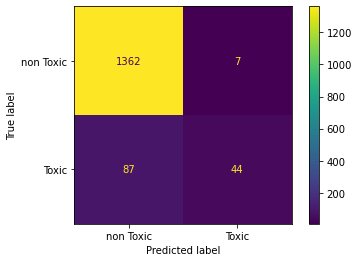


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1369
           1       0.86      0.34      0.48       131

    accuracy                           0.94      1500
   macro avg       0.90      0.67      0.73      1500
weighted avg       0.93      0.94      0.92      1500

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1369
           1       0.86      0.34      0.48       131

    accuracy                           0.94      1500
   macro avg       0.90      0.67      0.73      1500
weighted avg       0.93      0.94      0.92      1500

Accuracy of ROC curve 67 %



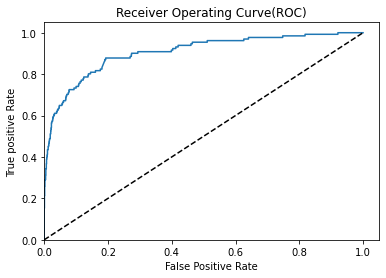

In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sns
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
svc=SVC(kernel='linear', probability=True)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(svc,X_train_tfidf,y_train,X_test_tfidf,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(svc.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
print(classification_Report)
p=plot_roc_auc(svc,X_test_tfidf)
model_name.append('SVC')
accuracy.append(p)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/X_test_tfidf.shape[0])*100
missclassified.append(missclass)

In [43]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# create SVM model
svm = SVC()

# set parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.1, 1, 10, 100],
    #'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}

# create StratifiedKFold object
cv = StratifiedKFold(n_splits=5)

# create GridSearchCV object
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=cv, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(X_train_tfidf,y_train)

# print the best parameters and accuracy score
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy Score: ", grid_search.best_score_)

Best Parameters:  {'C': 10, 'gamma': 0.1}
Accuracy Score:  0.948857142857143


Training Accuracy:- 1.0
Testing Accuracy:- 0.93
[0 1]


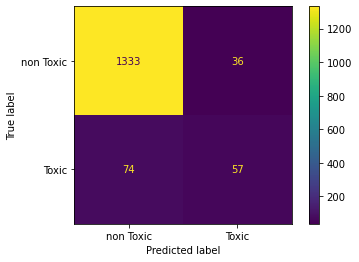


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1369
           1       0.61      0.44      0.51       131

    accuracy                           0.93      1500
   macro avg       0.78      0.70      0.73      1500
weighted avg       0.92      0.93      0.92      1500

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1369
           1       0.61      0.44      0.51       131

    accuracy                           0.93      1500
   macro avg       0.78      0.70      0.73      1500
weighted avg       0.92      0.93      0.92      1500

Accuracy of ROC curve 70 %



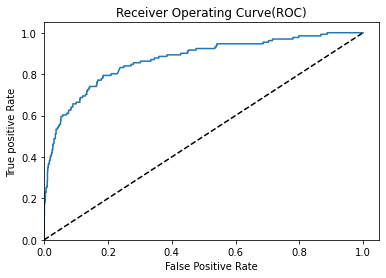

In [44]:
svc=SVC(kernel='linear', probability=True,C=10,gamma=0.1)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(svc,X_train_tfidf,y_train,X_test_tfidf,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(svc.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
print(classification_Report)
p=plot_roc_auc(svc,X_test_tfidf)
model_name.append('SVC')
accuracy.append(p)
missclass=((confusion_Matrix[0][1]+confusion_Matrix[1][0])/X_test_tfidf.shape[0])*100
missclassified.append(missclass)

# 15. What are the most prominent terms in the toxic comments?

Separate the comments from the test set that the model identified as toxic
Make one large list of the terms
Get the top 15 terms

In [49]:
# Separate the comments from the test set that the model identified as toxic
y_test_pred = svc.predict(X_test_tfidf)
x_test[y_test_pred==1]

,comment_text_cleaned
2916,comments west irrelevant well quote nuclear ph...
1513,thing persistant ugly bastard fucking troll
804,bull fucking shit racist scumbag
3271,eat
1621,boys suits ebla kids collection ekc wholesaler...
...,...
130,bkbkbkbk lease take time review standards veri...
2487,get life leftist freak reading comments seems ...
3203,hate crime believe category hate crimes accept...
1777,gay warning gay deletion troll


In [61]:
text_merged = []
for item in x_test[y_test_pred==1]['comment_text_cleaned']:
    text_merged = text_merged + item.split()

In [62]:
print(text_merged)

['comments', 'west', 'irrelevant', 'well', 'quote', 'nuclear', 'phsysicists', 'quote', 'politicians', 'usa', 'sweden', 'australia', 'put', 'quotes', 'end', 'stupid', 'comments', 'stupid', 'people', 'thing', 'persistant', 'ugly', 'bastard', 'fucking', 'troll', 'bull', 'fucking', 'shit', 'racist', 'scumbag', 'eat', 'boys', 'suits', 'ebla', 'kids', 'collection', 'ekc', 'wholesalers', 'manufacturer', 'boys', 'suits', 'boys', 'tuxedos', 'boys', 'formal', 'wear', 'boys', 'school', 'weaer', 'boys', 'uniform', 'suits', 'boys', 'suits', 'since', 'farzat', 'naqashieh', 'owner', 'chief', 'executive', 'officer', 'moutaz', 'naqashieh', 'regional', 'director', 'mohamed', 'naqashieh', 'director', 'public', 'relations', 'wwwebla', 'kidscom', 'preceding', 'unsigned', 'comment', 'added', 'contribs', 'edge', 'destiny', 'deleted', 'insist', 'needed', 'tell', 'for', 'hate', 'guts', 'hope', 'feel', 'good', 'wahabi', 'terrorism', 'added', 'heading', 'neutral', 'verifiable', 'missing', 'point', 'wahabi', 'rel

In [55]:
!pip install wordcloud

In [63]:
from wordcloud import WordCloud

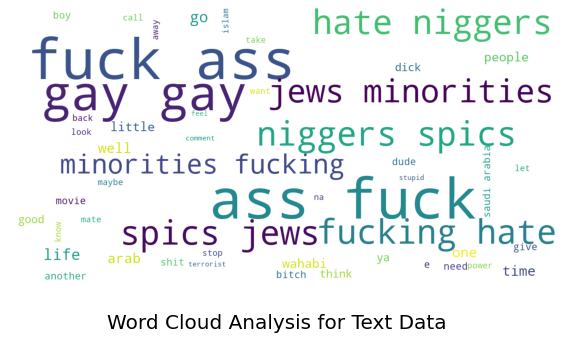

In [64]:
title = 'Word Cloud Analysis for Text Data'
wordcloud = WordCloud(
    background_color='white',
    stopwords=None,
    max_words=50,
    max_font_size=40, 
    scale=3,
    random_state=1 
).generate(" ".join(text_merged))

fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
if title: 
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    
plt.imshow(wordcloud);

In [65]:
freq_words = nltk.FreqDist(text_merged)
print(freq_words.most_common(100))

[('fuck', 292), ('ass', 286), ('gay', 219), ('fucking', 91), ('hate', 87), ('jews', 80), ('niggers', 79), ('spics', 79), ('minorities', 79), ('like', 16), ('go', 13), ('get', 13), ('life', 13), ('arab', 11), ('well', 9), ('saudi', 9), ('one', 9), ('na', 9), ('people', 8), ('mate', 8), ('little', 8), ('boys', 7), ('good', 7), ('ya', 7), ('time', 7), ('dick', 7), ('shit', 6), ('wahabi', 6), ('arabia', 6), ('e', 6), ('dude', 6), ('another', 6), ('ever', 6), ('bitch', 6), ('islam', 5), ('power', 5), ('stop', 5), ('think', 5), ('movie', 5), ('want', 5), ('maybe', 5), ('let', 5), ('need', 5), ('take', 5), ('back', 5), ('away', 5), ('give', 5), ('stupid', 4), ('suits', 4), ('feel', 4), ('pakistan', 4), ('deleting', 4), ('really', 4), ('u', 4), ('leave', 4), ('yes', 4), ('retarded', 4), ('hell', 4), ('suck', 4), ('ip', 4), ('guy', 4), ('never', 4), ('got', 4), ('editing', 4), ('someone', 4), ('arabic', 4), ('call', 4), ('nobhead', 4), ('see', 4), ('comments', 3), ('eat', 3), ('naqashieh', 3), 